# Insertion Sort
Insertion sort is an algorithm that sorts elements of an array. The algorithm builds the sorted array one element at a time by moving the ith element of the array to an index where all preceeding elements are smaller than the ith element. It repeats this process for every array element. Insertion sort has a simple implementation; however lots of swap operations are possible for unsorted arrays, which increases run time. <br>

Facts about insertion sort:
* comparison sorting algorithm: compares elements of an array
* stable sorting algorithm: preserves the relative order of equivalent elements
* in-place algorithm: has space complexity O(1), meaning it is memory efficient and the sorted array is made locally
* adaptive algorithm: run time is affected when given a partially sorted array
* deterministic algorithm: when given a certain input, same sequence of steps and result occurs
* online algorithm: sorts arrays as received, meaning data downloaded from the internet can be sorted with this algorithm

In [7]:
# global imports
from time import time
import matplotlib.pyplot as plt
from pandas import DataFrame
import statsmodels.formula.api as sm
import numpy as np
import import_ipynb
from CIandSETemplate import *

importing Jupyter notebook from CIandSETemplate.ipynb


## Insertion Sort Function
Steps to implement insertion sort function:
1. write the function for insertion sort
 - create a for loop that iterates through the entire array
 - set j equal to i (the index we are currently iterating over)
 - while the item before the jth index is greater than the jth index, swap the values at j and j - 1 with the swap function
 - then set j equal to j - 1 since j - 1 is the new index of the ith element of the initial array
 - continue this process until the ith element of the initial array is at an index where it is greater than all preceeding items
 - repeat this process for all elements of the array
 - return the sorted array
2. write the function for swapping values
 - create a temporary variable to hold i (the larger value)
 - set the array at index i equal to the value of j (the smaller value)
 - set the array at index j equal to the value of i (the larger value)

In [2]:
# insertion sort function
def insertionSort(arr):
    '''sorts an array of integers from smallest to largest'''
    for i in range(len(arr)):
        j = i
        while j > 0 and arr[j-1] > arr[j]:
            swap(arr, j, j-1)
            j = j - 1
    return arr

# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Timing Function
To obtain observed values for the runtime of the algorithm, I wrote a function that times how long it takes for the program to insertion sort an array. Steps to implement the timing function:
1. initialize a variable t that will hold the runtime
2. set t0 equal to the current time (before sorting)
3. sort the array with insertion sort
4. set t1 to the current time (after sorting)
5. set t equal to the difference between t1 and t0, which is the run time for sorting the array
6. return the run time

In [3]:
def timeOneInsert(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = insertionSort(arr)
    t1 = time()
    t = t1 - t0
    return t

## Sort Sample Arrays and Find Run Time
1. import arrrays of different lengths. These arrays are created in the arrays program. The arrays are used for each sorting algorithm, allowing for direct comparison of algorithms.
2. use timeOneInsert() function to find the run time of sorting each array

In [4]:
# import arrays
%store -r arr

# time how long it takes to sort each array
times = []
for element in arr:
    t = timeOneInsert(element)
    times.append(t)

## Theoretical Run Time With Big O 
### Calculate Time Complexity of Insertion Sort Function 

#### Swap Function Pseudo Code
```
swap(array, i, j) 
    temp = array[i]      // C1, repeated once
    array[i] = array[j]  // C2, repeated once
    array[j] = temp      // C3, repeated once
    
T = C1 + C2 + C3
T = C
```

#### Insertion Sort Function Pseudo Code
```
insertionSort(array)
    for i in range 0 to n                      // C1, repeated n+1 times
        j = i                                  // C2, repeated n times
        while j > 0 and array[j-1] > array[j]  // C3, repeated n + ... + 1 = n(n+1)/2 times
            swap(array, j, j-1)                // repeated (n-1) + ... + 1 = n(n-1)/2 times with runtime O(1)
            j = j-1                            // C4, repeated (n-1) + ... + 1 = n(n-1)/2 times
    return array                               // C5, repeated once
    
 T = C1*(n+1) + C2*n + C3*n(n+1)/2 + n(n-1)/2*O(1) + C4*n(n-1)/2 + C5
 T = C1*n^2 + C2*n + C3
```
The time complexity for insertion sort is O(n^2)

### Use Data to Find Coefficients for Theoretical Time Complexity Function O(n^2)
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n, and n^2, where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use polynomial regression to get the equation Y = a + bn + cn^2
 - a, b, and c are the ordinary least squares estimated coefficients
4. since insertion sort is O(n^2), theoretical run times are T = a + bn + cn^2
 - use the coefficients found in polynomial linear regression
 - n represents the length of the array

In [5]:
# array of ones
ones = [1, 1, 1, 1, 1, 1, 1, 1]

# array of lengths
length = [3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

# create an array of the squared lengths
squaredLengths = []
for i in range(0, 8):
    val = length[i] ** 2
    squaredLengths.append(val)

# create a dataframe
Data = {'ones': ones, 'length': length, 'squaredLengths': squaredLengths, 'times': times}
df = DataFrame(Data, columns=['ones', 'length', 'squaredLengths', 'times'])
# matrix of predictors
X = df[['ones', 'length', 'squaredLengths']]
# vector of responses
Y = df['times']

# fit polynomial regression
result = sm.OLS(Y, X).fit()

# theoretical coefficients
a = result.params[0]
b = result.params[1]
c = result.params[2]

### Ordinary Least Squares Estimated Coefficients of Theoretical Time Complexity Function
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals <br>
* the coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length

In [8]:
# variable holding confidence intervals
confInt = result.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = result.bse

# array of terms
terms = ['1', 'n', 'n^2']

# print the summaries
for i in range(0, 3):
    est = '{:10.9f}'.format(result.params[i])
    lower = '{:10.9f}'.format(confInt[0][i])
    upper = '{:10.9f}'.format(confInt[1][i])
    se = '{:10.9f}'.format(stE[i])
    if i == 0:
        estIntercept(est)
        CIintercept(lower, upper)
        SEintercept(se)  
    else:
        estTerm(est, terms[i])
        CITerm(lower, upper, terms[i])
        SEterm(se, terms[i])
    print()

The estimated intercept is -0.003142724. If the size of an array is 0, on average, I expect the run time to be -0.003142724 seconds.
I am 95% confident that the true average run time for an array of length 0 is between -0.333354887 and 0.327069439 seconds.
The standard error of the intercept is 0.128458141.

The estimated coefficent for the n term is 0.000015907. If n by one unit, on average, I expect the run time to increase by 0.000015907 seconds.
I am 95% confident that the true expected change in run time for one unit increase in n is between -0.000072964 and 0.000104778 seconds.
The standard error of the coefficient for the n term is 0.000034572.

The estimated coefficent for the n^2 term is 0.000000112. If n^2 by one unit, on average, I expect the run time to increase by 0.000000112 seconds.
I am 95% confident that the true expected change in run time for one unit increase in n^2 is between 0.000000106 and 0.000000117 seconds.
The standard error of the coefficient for the n^2 ter

## Compare Theoretical and Observed Run Time

### Scatterplot 
I created a scatterplot of the observed run times and the theoretical run times for sorting arrays of different lengths. 
* observed run times are plotted in blue, theoretical trend line is drawn in red
* observed values are very close to the theoretical trend line, meaning the theoretical run time of O(n^2) is a good estimate for this data
* discrepancies between observed and theoretical run time can be attributed to experimental error
* since insertion sort is O(n^2), there is a quadratic relationship between array size and run time

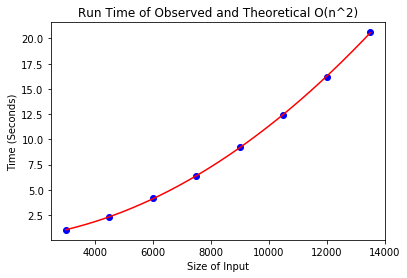

In [9]:
# regression line equation
x = np.linspace(3000, 13500, 10500)
line = a + b * x + c * x**2

# scatterplot of observed and theoretical O(n^2) values
plt.scatter(length, times, c = 'b')  # plot observed values in blue
plt.plot(x, line, c = 'r')  # plot regression line equation in red
plt.xlabel('Size of Input')
plt.ylabel('Time (Seconds)')
plt.title('Run Time of Observed and Theoretical O(n^2)')
plt.show()

### Mean Squared Error
- mean squared error measures the squared distance between observed and theoretical values. A small mean squared error indicates the observed and theoretical run times are similar.
- insertion sort obtains an MSE that is close to 0, meaning the theoretical run times are a good estimate
- this means insertion sort has a run time of O(n^2)

In [10]:
# output the MSE
MSE = '{:10.9f}'.format(result.mse_resid)
MSE

'0.003614408'

## Conclusion
- the theoretical run time of insertion sort is O(n^2)
- data obtained from sorting sample arrays supports this conclusion
    - on the scatterplot, observed values are close to theoretical values
    - the mean squared error is close to 0